<a href="https://colab.research.google.com/github/2uanDM/FDC105_final/blob/main/FDC105_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FDC105 Final project

## I. Dataset description

**Định nghĩa Customer churn** 

Customer churn là thuật ngữ trong kinh doanh, được hiểu là sự rời đi của khách hàng. Customer churn rate có nghĩa là tỷ lệ khách hàng rời đi trong một khoảng thời gian nhất định.
Trong kinh doanh, nếu khách hàng cảm thấy không hài lòng, thỏa mãn với dịch vụ và sản phẩm mà bạn cung cấp, họ sẽ rời đi, hay nói cách khác, họ sẽ ngừng kết nối hoặc hợp tác với doanh nghiệp của bạn. 

**Tầm quan trọng của Customer churn đối với doanh nghiệp**

*Thứ nhất*, vấn đề mất hụt tài chính. Rõ ràng, số lượng khách hàng rời đi càng nhiều, doanh thu và lợi nhuận của doanh nghiệp sẽ giảm, thậm chí là giảm ở con số lớn. Bên cạnh đó, theo trang Forrester, chi phí để sở hữu được một khách hàng mới nhiều gấp 5 lần chi phí để giữ một khách hàng cũ. Đặc biệt, chi phí để sở hữu một khách hàng trung thành mới nhiều gấp 16 lần chi phí cho khách hàng trung thành hiện tại. Như vậy, nếu mất khách hàng hiện tại, doanh nghiệp của bạn vừa mất một khoản doanh thu khá lớn cũng như tốn nhiều chi phí để kêu gọi, thu hút khách hàng mới.

*Thứ hai*, doanh thu sẽ tăng nếu customer churn rate thấp. Doanh nghiệp càng giữ được nhiều khách hàng, lợi nhuận càng cao. Theo báo cáo của trường đại học Harvard, trung bình, cứ 5% khách hàng được giữ lại, thì lợi nhuận thu vào sẽ dao động từ 25% đến 95%, những con số mà chúng ta chưa từng nghĩ tới. 
Vì vậy, việc quan tâm, chú ý đến Churn customer rate là cấp thiết để duy trì và phát triển doanh nghiệp.



>Đối với dịch vụ **"Heo số"**, nhóm định nghĩa **churn customer** là:
>*   Những khách hàng đã sử dụng dịch vụ "Heo số" - **Tổng số lần gửi tiết kiệm 'totalSavings2021_heoSo' không bị NULL**
>*   Không ghi nhận số dư tiết kiệm trong tối thiểu 3 tháng - **Số dư trong tài khoản tiết kiệm tại tháng 03 và 06 bị NULL hoặc bằng 0.**


> Sau khi đã xác định được churn customer, nhóm sẽ sử dụng dữ liệu về **thông tin cá nhân của khách hàng** cùng với những **hành vi** của khách hàng được ghi nhận **trong tháng 3** (các trường có chứa mar2021 hoặc Mar2021) để xây dựng mô hình dự đoán khách hàng churn.<br>
> Tiếp theo, nhóm sử dụng **mô hình đã xây dựng được** cùng với dữ liệu về **hành vi** của khách hàng **trong tháng 6** để dự đoán khách hàng có **xu hướng churn trong tương lai**.



## II. Load and preview the dataset 

### Import the modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns
import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score

### Pandas display options

In [ ]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

### Load dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/2uanDM/DataProcessing/main/dataset.csv')

### Preview dataset

#### Data information

In [ ]:
#  Viewing the data of top 5 rows to take a glimps of the data
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,rd_id,savingValueMar2021_heoSo,savingValueJuin2021_heoSo,totalLoginMar2021_heoSo,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543,1542621943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062,1570544787,NaN,NaN,NaN,NaN,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071,636921018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642516181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575,1308443119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,rd_id,savingValueMar2021_heoSo,savingValueJuin2021_heoSo,totalLoginMar2021_heoSo,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
99995,FEMALE,Single,1.0,6.0,178.0,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,2,16.0,Giao dich chuyen khoan,18.0,0.000108,15.0,Giao dich chuyen khoan,16.0,0.000351,581545472,0.000119,0.000061,3.0,8.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,MALE,Single,25.0,239.0,8689.0,2001.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,8.0,GIAO DICH PHI TAI CHINH,15.0,0.000116,561024968,NaN,0.000122,1.0,13.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,FEMALE,Married,31.0,316.0,11842.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000046,0.000333,0.000482,0.0,0.0,2.0,2.0,0.000012,0.000163,0.000051,0,0,2,4,5.0,Giao dich chuyen khoan,9.0,0.000436,2.0,Giao dich chuyen khoan,3.0,0.000170,1436724790,0.064286,0.032927,14.0,15.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,MALE,Single,1.0,271.0,9706.0,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,29.0,Giao dich chuyen khoan,36.0,0.000090,12.0,Giao dich chuyen khoan,13.0,0.000143,685139231,NaN,0.000793,12.0,38.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99999,MALE,Single,26.0,251.0,9070.0,2001.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0,0,1,1,6.0,Giao dich chuyen khoan,8.0,0.000019,19.0,Giao dich chuyen khoan,22.0,0.000109,1470216807,NaN,0.000366,8.0,13.0,0.021277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Getting the shape of dataset with rows and columns
df.shape

(100000, 50)

In [ ]:
#Getting all the columns
df.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province', 'resid_district',
       'resid_wards', 'birth_incorp_date', ' amount_week ', 'max_amount_week',
       'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', ' total_amt_mar2021 ', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo',
       'totalLoginMar2021_heoSo', 

In [ ]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   local_ref_1                   97266 non-null   object 
 1   vn_marital_status             96971 non-null   object 
 2   resid_province                93431 non-null   float64
 3   resid_district                93435 non-null   float64
 4   resid_wards                   93433 non-null   float64
 5   birth_incorp_date             99990 non-null   float64
 6    amount_week                  54800 non-null   float64
 7   max_amount_week               54800 non-null   float64
 8   min_amount_week               54800 non-null   float64
 9   distinct_payment_code_week    56850 non-null   float64
 10  count_payment_code_week       56850 non-null   float64
 11  distinct_trans_group_week     56850 non-null   float64
 12  distinct_ref_no_week          56850 non-null 

#### Unique values

In [ ]:
#print the unique value
df.nunique()

local_ref_1                          2
vn_marital_status                    7
resid_province                      64
resid_district                     704
resid_wards                       8782
birth_incorp_date                   86
 amount_week                        20
max_amount_week                   6044
min_amount_week                   3284
distinct_payment_code_week           6
count_payment_code_week             43
distinct_trans_group_week            6
distinct_ref_no_week               143
amount_month                     29957
max_amount_month                  8781
min_amount_month                  3004
distinct_payment_code_month          9
count_payment_code_month            81
distinct_trans_group_month           7
distinct_ref_no_month              368
amount_3month                    29754
max_amount_3month                 9280
min_amount_3month                 2805
distinct_payment_code_3month        10
count_payment_code_3month          116
distinct_trans_group_3mon

In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe()

,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,total_act_juin2021,total_amt_juin2021,rd_id,savingValueMar2021_heoSo,savingValueJuin2021_heoSo,totalLoginMar2021_heoSo,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,sectorJuin2021,product_codeJuin2021
count,93431.000000,93435.000000,93433.000000,99990.000000,54800.00000,5.480000e+04,54800.000000,56850.000000,56850.000000,56850.000000,56850.000000,7.700000e+04,7.700000e+04,77000.000000,82223.000000,82223.000000,82223.000000,82223.000000,8.652000e+04,8.652000e+04,86520.000000,100000.000000,100000.000000,100000.000000,100000.00000,73477.000000,73477.000000,7.285500e+04,71377.000000,71377.000000,70664.000000,1.000000e+05,5039.000000,7146.000000,7315.000000,7571.000000,7592.000000,29956.000000,29956.000000,29956.000000,29956.000000,29956.000000,20750.000000,29956.000000,29956.000000
mean,32.143379,339.395291,12481.062130,1988.480668,0.00059,1.223446e-03,0.000669,0.336851,0.577766,1.489921,6.178276,1.238261e-03,1.974828e-03,0.000121,0.744184,1.837539,2.023461,18.274339,6.747963e-04,1.372041e-03,0.000150,0.861720,4.051670,2.431310,40.06861,16.329436,19.152252,1.370018e-03,16.359696,19.396963,0.003563,9.975362e+08,0.016161,0.009473,20.119207,29.372606,0.016666,0.003399,0.005937,0.003274,1.780111,17776.982574,407.920916,1803.790292,24257.601716
std,29.360372,278.936947,10064.755806,9.474698,0.00615,6.287416e-03,0.007529,0.526343,2.857005,0.706985,11.763902,7.281018e-03,8.754136e-03,0.004095,0.870959,5.174273,0.979911,41.825200,4.872849e-03,6.238066e-03,0.004568,0.998603,8.794302,1.161273,90.35093,36.292739,37.629618,9.134551e-03,33.845842,35.468908,0.018221,5.782695e+08,0.060268,0.036145,43.930013,56.832050,0.021570,0.016369,0.027024,0.017217,1.033548,5929.056978,44.138990,77.447833,1963.354679
min,0.000000,0.000000,0.000000,1073.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e-10,2.040000e-09,0.000000,0.000000,0.000000,1.000000,0.000000,6.570000e-11,1.000000e-09,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.100000e-08,1.000000,1.000000,0.000000,1.200300e+04,0.000000,0.000000,1.000000,1.000000,0.010638,0.000000,0.000000,-0.136527,1.000000,1005.000000,306.000000,1690.000000,21113.000000
25%,1.000000,21.000000,637.000000,1983.000000,0.00000,3.060000e-05,0.000011,0.000000,0.000000,1.000000,1.000000,2.400000e-05,8.160000e-05,0.000002,0.000000,0.000000,1.000000,3.000000,1.280000e-05,6.300000e-05,0.000001,0.000000,0.000000,1.000000,4.00000,3.000000,4.000000,2.737600e-05,3.000000,4.000000,0.000084,4.954611e+08,0.001190,0.000610,5.000000,8.000000,0.010638,0.000000,0.000000,0.000000,1.000000,17002.000000,379.000000,1740.000000,23212.000000
50%,30.000000,298.000000,11077.000000,1990.000000,0.00000,1.551020e-04,0.000045,0.000000,0.000000,1.000000,3.000000,1.017675e-04,3.040205e-04,0.000004,1.000000,1.000000,2.000000,9.000000,5.740000e-05,2.020645e-04,0.000003,1.000000,1.000000,2.000000,17.00000,7.000000,10.000000,1.098480e-04,8.000000,10.000000,0.000319,9.965913e+08,0.002619,0.001585,10.000000,16.000000,0.010638,0.000029,0.000094,0.000000,1.000000,21061.000000,386.000000,1830.000000,23231.000000
75%,51.000000,532.000000,21385.000000,1995.000000,0.00000,7.297960e-04,0.000182,1.000000,1.000000,2.000000,7.000000,5.404727e-04,1.224490e-03,0.000012,1.000000,3.000000,3.000000,20.000000,2.978360e-04,1.0

#### Missing values

In [ ]:
#check for count of missing values in each column.
df.isnull().sum()

local_ref_1                      2734
vn_marital_status                3029
resid_province                   6569
resid_district                   6565
resid_wards                      6567
birth_incorp_date                  10
 amount_week                    45200
max_amount_week                 45200
min_amount_week                 45200
distinct_payment_code_week      43150
count_payment_code_week         43150
distinct_trans_group_week       43150
distinct_ref_no_week            43150
amount_month                    23000
max_amount_month                23000
min_amount_month                23000
distinct_payment_code_month     17777
count_payment_code_month        17777
distinct_trans_group_month      17777
distinct_ref_no_month           17777
amount_3month                   13480
max_amount_3month               13480
min_amount_3month               13480
distinct_payment_code_3month        0
count_payment_code_3month           0
distinct_trans_group_3month         0
distinct_ref

In [ ]:
# Calculate the percentage of missing values
missing = pd.DataFrame((df.isnull().sum())/df.shape[0]).reset_index()
missing = missing.rename(columns={0:'pct'})

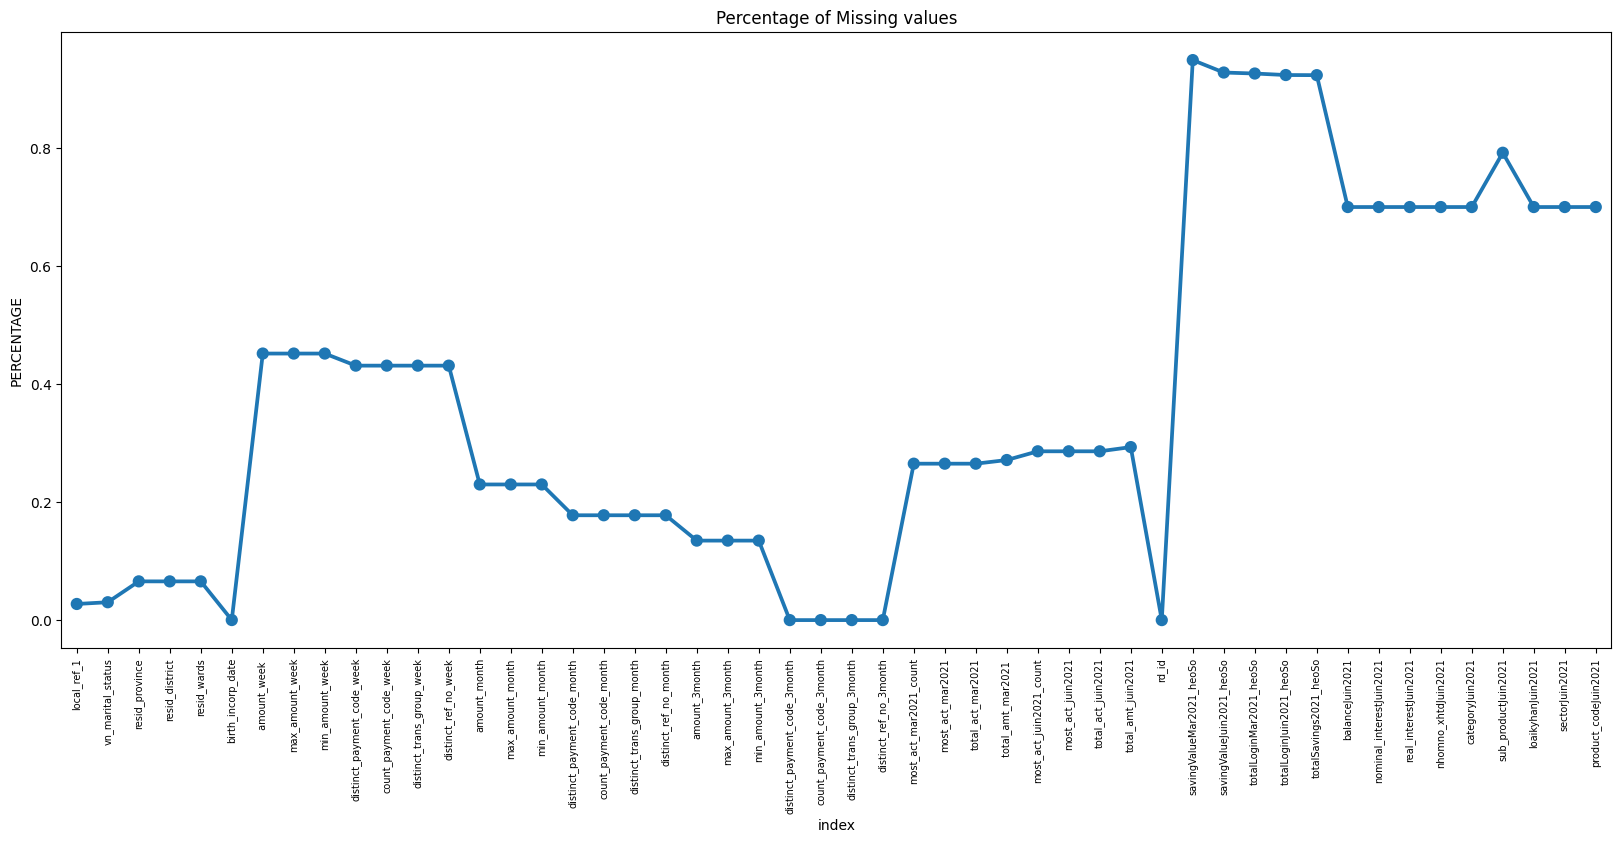

In [ ]:
# Draw chart describing percentage of missing values
plt.figure(figsize=(20,8))
ax = sns.pointplot(x='index',y='pct',data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

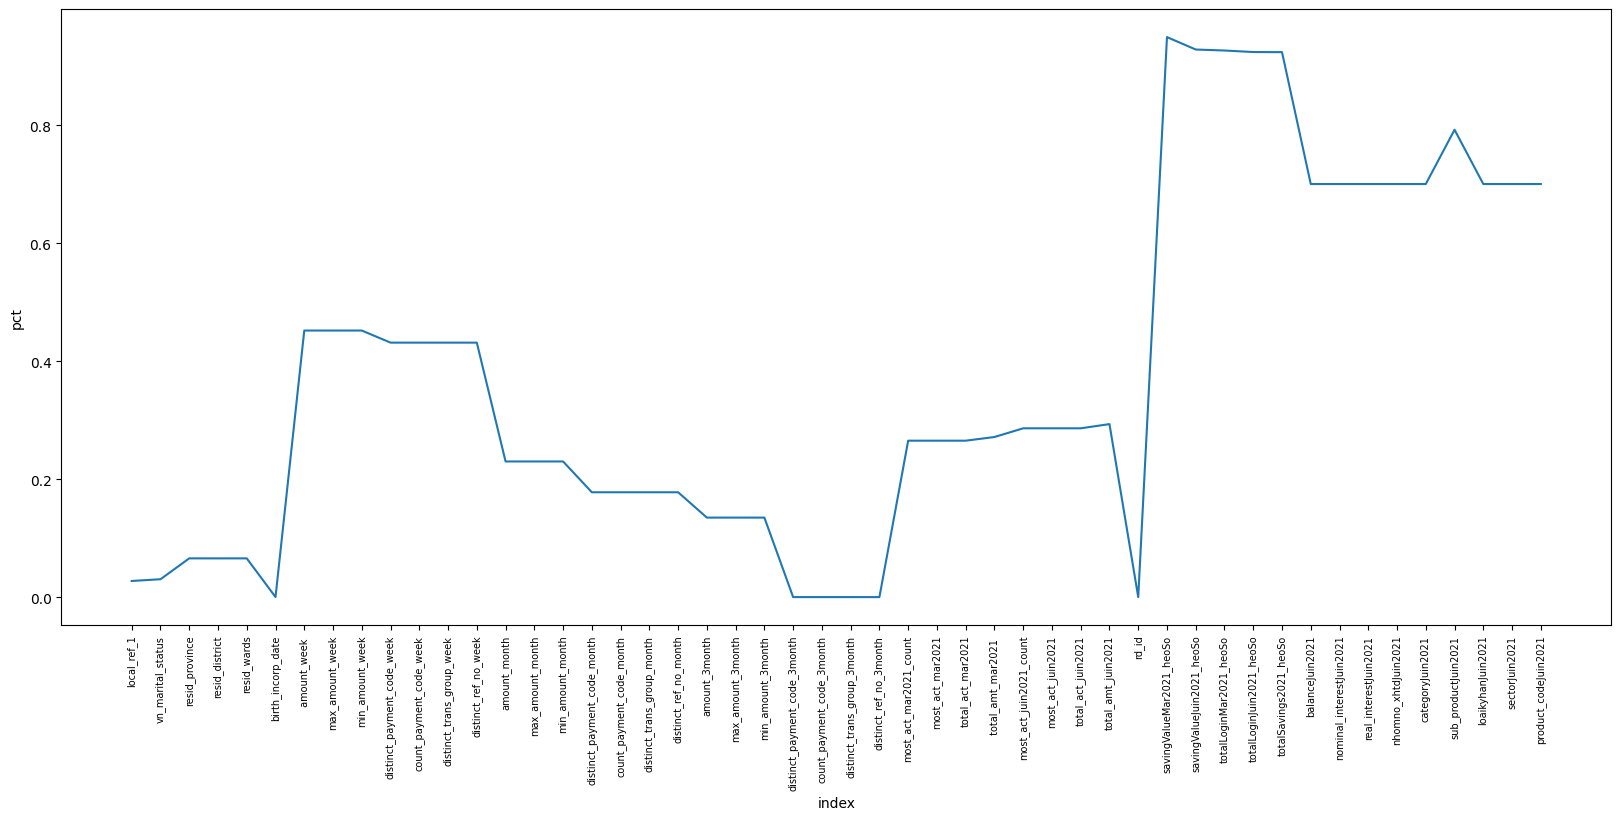

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='index',y='pct',data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.show()

## III. Data Cleanning 

### Rename

In [ ]:
df.rename(columns={'local_ref_1': 'gender',
                   'vn_marital_status':'marital_status',
                   'birth_incorp_date':'birth_of_date',
                   'max_amount_week':'max_week',
                   'min_amount_week':'min_week', 
                   'distinct_payment_code_week':'service_code_week',
                   'count_payment_code_week':'service_no_week', 
                   'distinct_trans_group_week':'trans_group_week',
                   'distinct_ref_no_week': 'ref_no_week', 
                   'max_amount_month':'max_month', 
                   'min_amount_month':'min_month',
                   'distinct_payment_code_month':'service_code_month', 
                   'count_payment_code_month':'service_no_month',
                   'distinct_trans_group_month':'trans_group_month', 
                   'distinct_ref_no_month':'ref_no_month',
                   'max_amount_3month':'max_3month', 
                   'min_amount_3month':'min_3month', 
                   'distinct_payment_code_3month':'service_code_3month',
                   'count_payment_code_3month':'service_no_3month',
                   'distinct_trans_group_3month':'trans_group_3month',
                   'distinct_ref_no_3month ':'ref_no_3month',
                   'most_act_mar2021_count':'count_most_act_3',
                   'most_act_mar2021':'most_act_3',
                   'total_act_mar2021':'total_act_3',
                   'total_amt_mar2021':'total_amt_3',
                   'most_act_juin2021_count':'count_most_act_6',
                   'most_act_juin2021':'most_act_6',
                   'total_act_juin2021':'total_act_6',
                   'total_amt_juin2021':'total_amt_6',
                   'savingValueMar2021_heoSo':'saving_value_3',
                   'savingValueJuin2021_heoSo':'saving_value_6',
                   'totalLoginMar2021_heoSo':'total_login_3',
                   'totalLoginJuin2021_heoSo':'total_login_6',
                   'totalSavings2021_heoSo':'total_login_heoso',
                   'balanceJuin2021':'balance',
                   'nominal_interestJuin2021':'nominal',
                   'real_interestJuin2021':'real_interest',
                   'nhomno_xhtdJuin2021':'loan',
                   'categoryJuin2021':'category',
                   'sub_productJuin2021':'sub_product',
                   'loaikyhanJuin2021':'deposite',
                   'sectorJuin2021':'sector',
                   'product_codeJuin2021':'product_code'}, inplace=True)
df.head()

,gender,marital_status,resid_province,resid_district,resid_wards,birth_of_date,amount_week,max_week,min_week,service_code_week,service_no_week,trans_group_week,ref_no_week,amount_month,max_month,min_month,service_code_month,service_no_month,trans_group_month,ref_no_month,amount_3month,max_3month,min_3month,service_code_3month,service_no_3month,trans_group_3month,distinct_ref_no_3month,count_most_act_3,most_act_3,total_act_3,total_amt_mar2021,count_most_act_6,most_act_6,total_act_6,total_amt_6,rd_id,saving_value_3,saving_value_6,total_login_3,total_login_6,total_login_heoso,balance,nominal,real_interest,loan,category,sub_product,deposite,sector,product_code
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543,1542621943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062,1570544787,NaN,NaN,NaN,NaN,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071,636921018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642516181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575,1308443119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Xóa bỏ các space bị thừa xung quanh tên các trường
df.columns = df.columns.str.strip(' ') 

### Labeling data

#### Labeling churn

Quan sát những trường liên quan tới app **Heo Số**:

* `saving_value_3`: Tổng số dư trong app tháng 3
* `saving_value_6`: Tổng số dư trong app tháng 6
* `total_login_3`: Tổng số lần đăng nhập app tháng 3
* `total_login_6`: Tổng số lần đăng nhập app tháng 6
* `total_savings`: Tổng số dư từ trước cho đến nay

Ta sẽ có những logic về liệu khách hàng đó Churn hay không: 
* Thứ nhất, khách hàng Churn thì trước tiên người đó phải đã hoặc đang sử dụng app Heo Số. Ta sẽ chọn ra những khách hàng đó bằng cách là lựa chọn những khách hàng mà tổng số dư trong app là một giá trị không `NULL`:



In [ ]:
df = df[df['total_login_heoso'].notnull()].reset_index()

* Thứ hai, những khách hàng **Churn** khả năng cao là những khách hàng không ghi nhận s**ố dư tiết kiệm** trong cả tháng 3 và tháng 6. Do đó ta sẽ có điều kiện `churn_cond_0` và `churn_cond_1` như sau:


In [ ]:
churn_cond_0 = (df["saving_value_3"] == 0) & (df["saving_value_6"] == 0)
churn_cond_1 = df["saving_value_3"].isnull() & df["saving_value_6"].isnull()

* Thứ ba, những khách hàng **Churn** khả năng cao là những khách hàng không ghi nhận **lượt login** nào vào app Heo Số trong cả tháng 3 và tháng 6. Do đó ta sẽ có điều kiện `churn_cond_2` như sau:


In [ ]:
churn_cond_2 = (df['total_login_3'] == 0) & (df['total_login_6'] == 0)

 Nhóm cũng đã kiểm tra các điều kiện khác "tự nhiên hơn" để xác định **khách hàng Churn**, tuy nhiên những trường hợp đó lại không xảy ra với bộ data này:

In [ ]:
# Ghi nhận số dư vào tháng 3 nhưng không ghi nhận số dư vào tháng 6:
count_cond = (df["saving_value_3"].notnull() & df["saving_value_6"].isnull()).sum()

print(f'Có {count_cond} khách hàng ghi nhận số dư vào tháng 3 nhưng không ghi nhận số dư vào tháng 6')

Có 0 khách hàng ghi nhận số dư vào tháng 3 nhưng không ghi nhận số dư vào tháng 6


Kết hợp hai điều kiện `churn_cond_0`, `churn_cond_1` và `churn_cound_2`, ta sẽ tạo label `is_churn`:

In [ ]:
df['is_churn'] = (churn_cond_0 | churn_cond_1 | churn_cond_2).astype('int')

#### Kiểm tra xem phân phối của Churn status:

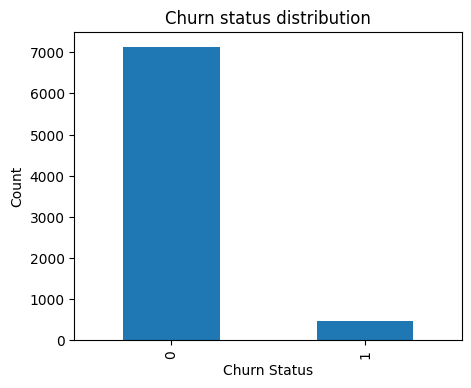

In [ ]:
df['is_churn'].value_counts().plot(kind='bar',
                                   xlabel='Churn Status',
                                   ylabel='Count',
                                   title='Churn status distribution',
                                   figsize=(5,4),
                                   fontsize=10)
plt.show()

In [ ]:
df['is_churn'].value_counts()

0    7143
1     449
Name: is_churn, dtype: int64

Kiểm tra tỉ lệ churn theo giới tính:

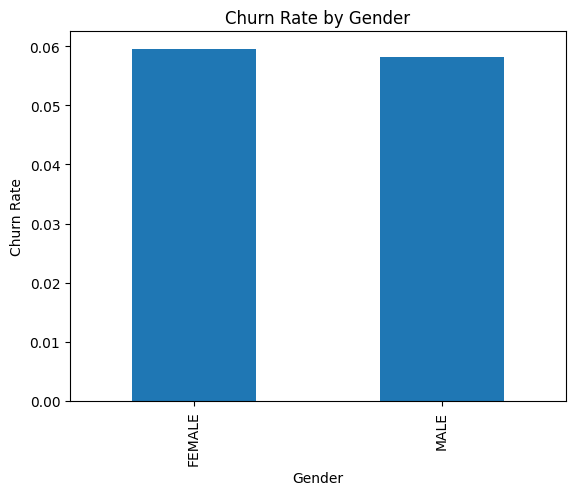

In [ ]:
churn_by_gender = df.groupby('gender')['is_churn'].mean()
churn_by_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

Ở đây, có thể thấy tỉ lệ churn của khách hàng nữ trong tổng số khách hàng nữ ít hơn tỉ lệ churn của khách hàng nam trong tổng số khách hàng nam. Điều này có thể chỉ ra rằng khách hàng nữ có xu hướng ổn định hơn và ít có khả năng churn (hủy dịch vụ) so với khách hàng nam.


Tỉ lệ Churn theo các loại đô thị:

In [ ]:
#Chia thành các loại đô thị khác nhau 
#0:Đô thị đặc biệt
#1:Đô thị loại I
#2:Đô thị loại II
#3:Đô thị loại II
province = []
for i in range(len(df['resid_province'])):
    if df['resid_province'][i] in [1, 79]:
        province.append(0)
    elif df['resid_province'][i] in [31, 48, 92, 19, 36, 25, 22, 27, 30, 38, 40, 46, 52, 56, 66, 64, 68, 77, 75, 74, 82, 89]:
        province.append(1)
    elif df['resid_province'][i] in [6, 8, 26, 27, 45, 58, 67, 83, 84, 86, 93, 95]:
        province.append(3)
    else:
        province.append(2)
df['province'] = province
df.head()

,index,gender,marital_status,resid_province,resid_district,resid_wards,birth_of_date,amount_week,max_week,min_week,service_code_week,service_no_week,trans_group_week,ref_no_week,amount_month,max_month,min_month,service_code_month,service_no_month,trans_group_month,ref_no_month,amount_3month,max_3month,min_3month,service_code_3month,...,count_most_act_3,most_act_3,total_act_3,total_amt_mar2021,count_most_act_6,most_act_6,total_act_6,total_amt_6,rd_id,saving_value_3,saving_value_6,total_login_3,total_login_6,total_login_heoso,balance,nominal,real_interest,loan,category,sub_product,deposite,sector,product_code,is_churn,province
0,491,FEMALE,Married,17.0,148.0,4810.0,1982.0,0.0,0.000143,0.000005,2.0,2.0,3.0,13.0,0.000308,0.000612,0.000001,4.0,4.0,4.0,37.0,0.000161,0.000300,0.000001,4,...,35.0,Giao dich chuyen khoan,40.0,0.000097,18.0,Giao dich chuyen khoan,22.0,0.000199,981253009,0.000476,0.000244,11.0,11.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1,677,MALE,Married,1.0,2.0,85.0,1991.0,0.0,0.000408,0.000045,0.0,0.0,3.0,13.0,0.000661,0.000816,0.000006,1.0,4.0,4.0,50.0,0.000439,0.000450,0.000003,1,...,62.0,Giao dich chuyen khoan,67.0,0.000587,22.0,Giao dich chuyen khoan,32.0,0.000603,1583440825,NaN,0.000305,3.0,7.0,0.010638,0.001312,0.003213,0.002024,2.0,21064.0,462.0,TH,1747.0,23231.0,0,0
2,774,MALE,Married,40.0,425.0,17497.0,1991.0,0.0,0.000017,0.000023,0.0,0.0,1.0,4.0,0.000013,0.000017,0.000006,0.0,0.0,3.0,12.0,0.000003,0.000008,0.000006,0,...,NaN,NaN,NaN,NaN,5.0,Giao dich chuyen khoan,6.0,0.000014,769365616,0.000238,0.000122,10.0,10.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,842,FEMALE,Single,38.0,380.0,14791.0,1992.0,0.0,0.000028,0.000032,0.0,0.0,1.0,4.0,0.000015,0.000028,0.000006,0.0,0.0,1.0,9.0,0.000017,0.000040,0.000005,1,...,5.0,Giao dich chuyen khoan,6.0,0.000048,5.0,Giao dich chuyen khoan,11.0,0.000381,946913495,NaN,0.001220,NaN,1.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,993,MALE,Single,52.0,540.0,21577.0,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000047,0.000670,0.000142,0,...,1.0,Giao dich chuyen khoan,1.0,0.000010,1.0,GIAO DICH PHI TAI CHINH,2.0,0.000009,1974099661,0.000119,0.000061,14.0,15.0,0.010638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


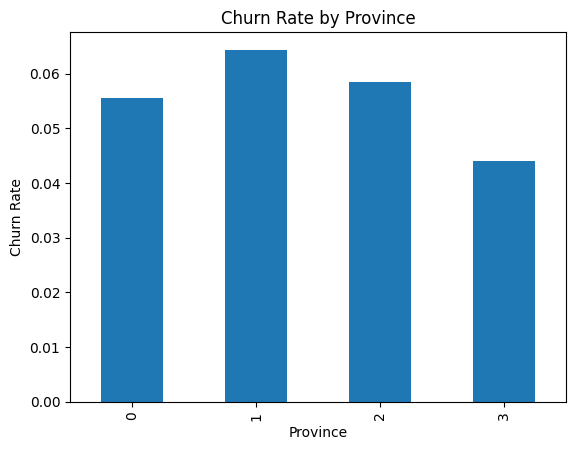

In [ ]:
churn_by_province = df.groupby('province')['is_churn'].mean()
churn_by_province.plot(kind='bar')
plt.xlabel('Province')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Province')
plt.show()

Label ở đây dang khá là chênh lệch, do đó trong phần mô hình hóa, nhóm sẽ phải sử dụng các kĩ thuật imbalance modelling như **SMOTE**

### Loại bỏ các trường không sử dụng

In [ ]:
df1 = df.drop(['index','resid_district','resid_province',
       'resid_wards', 'max_week', 'min_week', 'trans_group_week',
       'max_month', 'min_month','trans_group_month',
       'max_3month', 'min_3month',
       'service_code_3month', 'service_no_3month',
       'distinct_ref_no_3month', 'count_most_act_3',
       'count_most_act_6', 'deposite', 'rd_id','category',
       'sub_product', 'sector', 'product_code','balance','nominal','real_interest','loan', 'deposite'], axis =1)

In [ ]:
df1.isnull().sum()

gender                 138
marital_status         151
birth_of_date            0
amount_week           1418
service_code_week     1289
service_no_week       1289
ref_no_week           1289
amount_month           367
service_code_month     231
service_no_month       231
ref_no_month           231
amount_3month          201
trans_group_3month       0
most_act_3             227
total_act_3            227
total_amt_mar2021      235
most_act_6             241
total_act_6            241
total_amt_6            258
saving_value_3        2553
saving_value_6         446
total_login_3          277
total_login_6           21
total_login_heoso        0
is_churn                 0
dtype: int64

### Handle missing values

Biến Categorical

In [ ]:
# Tìm giá trị có tần suất xuất hiện nhiều nhất
most_frequent_gender = df1["gender"].mode()[0]
most_frequent_status = df1["marital_status"].mode()[0]
most_frequent_act3 = df1["most_act_3"].mode()[0]
most_frequent_act6 = df1["most_act_6"].mode()[0]

# Điền giá trị thiếu bằng giá trị có tần suất xuất hiện nhiều nhất
df1["gender"].fillna(most_frequent_gender, inplace=True)
df1["marital_status"].fillna(most_frequent_status, inplace=True)
df1["most_act_3"].fillna(most_frequent_act3, inplace=True)
df1["most_act_6"].fillna(most_frequent_act6, inplace=True)

In [ ]:
object_columns = df1.select_dtypes(include=['object']).columns
for col in object_columns:
  unique_val = df1[col].unique()
  count = len(unique_val)
  print(f'{col} ({count} distinct values): {unique_val} \n')

gender (2 distinct values): ['FEMALE' 'MALE'] 

marital_status (3 distinct values): ['Married' 'Single' 'Other'] 

most_act_3 (6 distinct values): ['Giao dich chuyen khoan' 'Giao dich thanh toan' 'GIAO DICH TIET KIEM'
 'GIAO DICH RUT TIEN ATM' 'GIAO DICH PHI TAI CHINH' 'GIAO DICH THANH TOAN'] 

most_act_6 (6 distinct values): ['Giao dich chuyen khoan' 'GIAO DICH PHI TAI CHINH' 'Giao dich thanh toan'
 'GIAO DICH RUT TIEN ATM' 'GIAO DICH TIET KIEM' 'GIAO DICH THANH TOAN'] 



In [ ]:
# Đồng nhất kiểu chữ các giá trị trong cột "most_act_3"
df1['most_act_Mar'] = df1['most_act_3'].apply(lambda x: str(x).title())
df1.drop(['most_act_3'], axis=1, inplace=True)
print(df1['most_act_Mar'].head())


0    Giao Dich Chuyen Khoan
1    Giao Dich Chuyen Khoan
2    Giao Dich Chuyen Khoan
3    Giao Dich Chuyen Khoan
4    Giao Dich Chuyen Khoan
Name: most_act_Mar, dtype: object


In [ ]:
# Đồng nhất kiểu chữ các giá trị trong cột "most_act_6"
df1['most_act_Juin'] = df1['most_act_6'].apply(lambda x: str(x).title())
df1.drop(['most_act_6'], axis=1, inplace=True)
print(df1['most_act_Juin'].head())

0     Giao Dich Chuyen Khoan
1     Giao Dich Chuyen Khoan
2     Giao Dich Chuyen Khoan
3     Giao Dich Chuyen Khoan
4    Giao Dich Phi Tai Chinh
Name: most_act_Juin, dtype: object



Xử lí các giá trị ở cột "most_act_3" và cột "most_act_6" vì các giá trị viết hoa, viết thường không đồng nhất

Biến numeric

In [ ]:
columns_to_fill = ['amount_week', 'ref_no_week', 'amount_month', 'ref_no_month',
                   'saving_value_3', 'saving_value_6', 'total_login_3', 'total_login_6',
                   'amount_3month']
df1[columns_to_fill] = df1[columns_to_fill].fillna(0)

In [ ]:
df1.isnull().sum() 

gender                   0
marital_status           0
birth_of_date            0
amount_week              0
service_code_week     1289
service_no_week       1289
ref_no_week              0
amount_month             0
service_code_month     231
service_no_month       231
ref_no_month             0
amount_3month            0
trans_group_3month       0
total_act_3            227
total_amt_mar2021      235
total_act_6            241
total_amt_6            258
saving_value_3           0
saving_value_6           0
total_login_3            0
total_login_6            0
total_login_heoso        0
is_churn                 0
most_act_Mar             0
most_act_Juin            0
dtype: int64

Đối với các cặp biến loại giao dịch - số lần giao dịch nhóm sẽ drop những giá trị missing value

In [ ]:
df1.dropna(axis = 0, inplace = True)

### Handling special features

#### Tạo cột "Age"

In [ ]:
df1['age']=2020-df1['birth_of_date']
df1.drop('birth_of_date', axis=1, inplace=True)

In [ ]:
df1.columns

Index(['gender', 'marital_status', 'amount_week', 'service_code_week',
       'service_no_week', 'ref_no_week', 'amount_month', 'service_code_month',
       'service_no_month', 'ref_no_month', 'amount_3month',
       'trans_group_3month', 'total_act_3', 'total_amt_mar2021', 'total_act_6',
       'total_amt_6', 'saving_value_3', 'saving_value_6', 'total_login_3',
       'total_login_6', 'total_login_heoso', 'is_churn', 'most_act_Mar',
       'most_act_Juin', 'age'],
      dtype='object')

#### Marriage_status

#### Most_act_3 & Most_act_6

### Handling outliers

In [ ]:
import numpy as np

def Zscore_outlier(col):
    out = {col: 0}
    m = np.mean(df1[col])
    sd = np.std(df1[col])
    for i in df1[col]: 
        z = (i - m) / sd
        if np.abs(z) > 3.0: # Nhóm định nghĩa Outliers có z-score > 3.0
            out[col] += 1
    return out

# Numeric features
numeric_columns = df1.select_dtypes(include=['number']).drop(['service_code_week', 'service_code_month', 'is_churn'], axis=1)

for col in numeric_columns:
    print(Zscore_outlier(col))


{'amount_week': 63}
{'service_no_week': 45}
{'ref_no_week': 102}
{'amount_month': 132}
{'service_no_month': 51}
{'ref_no_month': 83}
{'amount_3month': 72}
{'trans_group_3month': 0}
{'total_act_3': 84}
{'total_amt_mar2021': 63}
{'total_act_6': 116}
{'total_amt_6': 56}
{'saving_value_3': 56}
{'saving_value_6': 76}
{'total_login_3': 40}
{'total_login_6': 58}
{'total_login_heoso': 68}
{'age': 43}


In [ ]:
# Xóa các dòng chứa outlier
for col in numeric_columns:
    z_outliers = np.abs(stats.zscore(df1[col])) > 3.0
    df1 = df1[~z_outliers]

print("Số dòng sau khi loại bỏ outlier:", len(df1))

Số dòng sau khi loại bỏ outlier: 4747


In [ ]:
# Phân nhóm cột marital_status thành 3 nhóm: 'Married', 'Single', 'Other'
df1 = df1.replace({'Partner': 'Other', 'Divorced': 'Other', 'Widow': 'Other', 'Seperated': 'Other'})

Text(0.5, 1.0, 'Comparsion betweeen Marital Status')

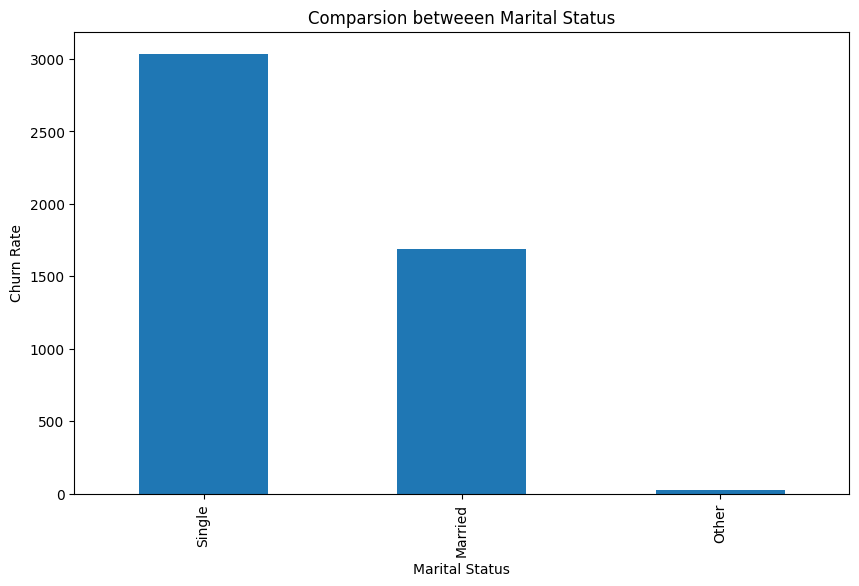

In [ ]:

# Phân bổ của 3 nhóm 'Married', 'Single', 'Other':
churn_by_marital_status = df1.groupby('marital_status')['is_churn'].mean()
plt.figure(figsize=(10, 6))
df1['marital_status'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Churn Rate')
plt.title("Comparsion betweeen Marital Status")


### Check for duplicates

## IV. Analyze columns and Feature *Engineering*

## V. Exploratory Data Analysis

### Categorical features

#### Loại giao dịch

In [ ]:
new_df = pd.DataFrame(data={'Mar' : df['most_act_6'].value_counts().values, 
                               'June': df['most_act_3'].value_counts().values},
                      index=['Giao Dich Chuyen Khoan', 'Giao Dich Thanh Toan', 'Giao Dich Tiet Kiem','Giao Dich Phi Tai Chinh','Giao Dich Rut Tien Atm'])

ValueError: ignored

NameError: ignored

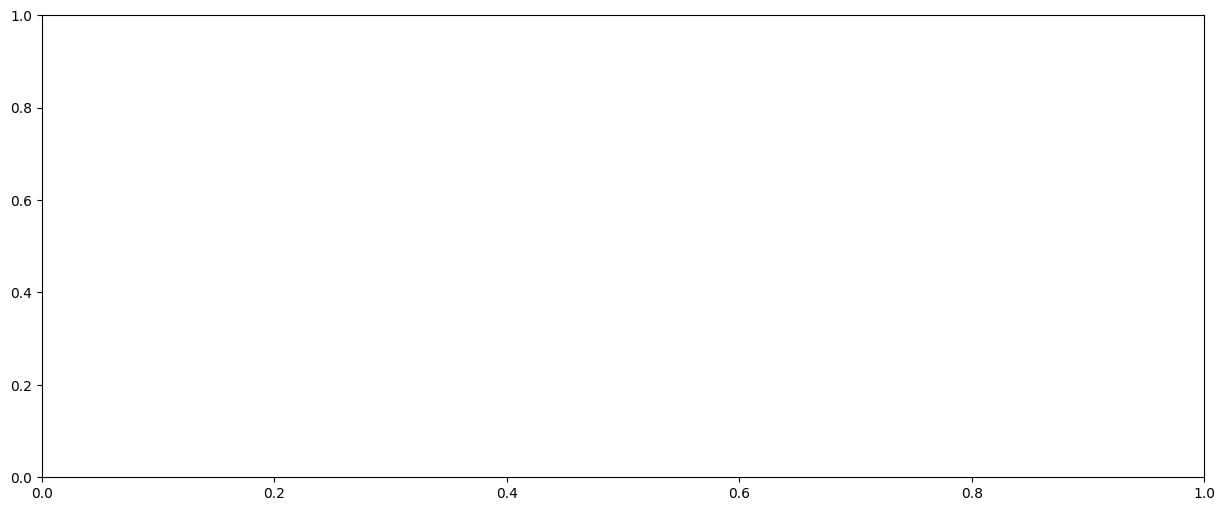

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
x = np.arange(len(new_df.index))
width = 0.35

# Plotting the bars for 'Mar'
rects1 = ax.bar(x - width/2, new_df['Mar'], width, label='Mar')

# Plotting the bars for 'June'
rects2 = ax.bar(x + width/2, new_df['June'], width, label='June')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Số KH', fontsize = 14)
ax.set_title('Số lượng khách hàng sử dụng các hình thức giao dịch sử dụng trong tháng Ba và tháng Sáu', fontsize = 14)
ax.set_xticks(x)
ax.set_ylim(0,7001)
ax.set_xticklabels(new_df.index, rotation=45)
ax.legend()
plt.show()

* Dựa vào hai biểu đồ trên, ta thấy được rằng người dùng ưa chụng hình thức "Giao dịch chuyển khoản" nhất với khoảng hơn 6500 người sử dụng, trong khi "Giao dịch rút tiền Atm" là hình thức có ít người sử dụng nhất, chiếm tỉ lệ rất nhỏ

#### Loại dịch vụ

In [ ]:
df.columns

Index(['index', 'gender', 'marital_status', 'resid_province', 'resid_district',
       'resid_wards', 'birth_of_date', 'amount_week', 'max_week', 'min_week',
       'service_code_week', 'service_no_week', 'trans_group_week',
       'ref_no_week', 'amount_month', 'max_month', 'min_month',
       'service_code_month', 'service_no_month', 'trans_group_month',
       'ref_no_month', 'amount_3month', 'max_3month', 'min_3month',
       'service_code_3month', 'service_no_3month', 'trans_group_3month',
       'distinct_ref_no_3month', 'count_most_act_3', 'most_act_3',
       'total_act_3', 'total_amt_mar2021', 'count_most_act_6', 'most_act_6',
       'total_act_6', 'total_amt_6', 'rd_id', 'saving_value_3',
       'saving_value_6', 'total_login_3', 'total_login_6', 'total_login_heoso',
       'balance', 'nominal', 'real_interest', 'loan', 'category',
       'sub_product', 'deposite', 'sector', 'product_code', 'is_churn',
       'province'],
      dtype='object')

In [ ]:
def plot_value_counts(df, column, xlabel, ylabel, title):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', xlabel=xlabel, ylabel=ylabel, title=title)
    plt.show()

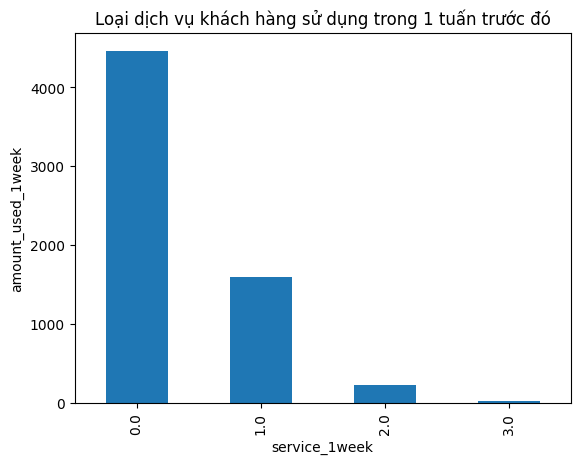

In [ ]:
plot_value_counts(df,'service_code_week','service_1week', 'amount_used_1week',title='Loại dịch vụ khách hàng sử dụng trong 1 tuấn trước đó')

## VI. Data preprocessing for Machine Learning 

##Preprocessing

**Get dummies với các trường Categorical vì các trường đều có ít unique value nên không bị tạo ra quá nhiều cột và gặp phải hiện tượng tự tương quan**

In [ ]:
df1

,gender,marital_status,amount_week,service_code_week,service_no_week,ref_no_week,amount_month,service_code_month,service_no_month,ref_no_month,amount_3month,trans_group_3month,total_act_3,total_amt_mar2021,total_act_6,total_amt_6,saving_value_3,saving_value_6,total_login_3,total_login_6,total_login_heoso,is_churn,most_act_Mar,most_act_Juin,age
0,FEMALE,Married,0.0,2.0,2.0,13.0,0.000308,4.0,4.0,37.0,1.613140e-04,4,40.0,0.000097,22.0,0.000199,0.000476,0.000244,11.0,11.0,0.010638,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,38.0
1,MALE,Married,0.0,0.0,0.0,13.0,0.000661,1.0,4.0,50.0,4.390220e-04,5,67.0,0.000587,32.0,0.000603,0.000000,0.000305,3.0,7.0,0.010638,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,29.0
3,FEMALE,Single,0.0,0.0,0.0,4.0,0.000015,0.0,0.0,9.0,1.680000e-05,3,6.0,0.000048,11.0,0.000381,0.000000,0.001220,0.0,1.0,0.010638,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,28.0
5,MALE,Single,0.0,1.0,1.0,5.0,0.000039,1.0,4.0,34.0,3.230000e-05,3,43.0,0.000091,52.0,0.001594,0.000000,0.000183,3.0,16.0,0.010638,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,16.0
6,MALE,Single,0.0,0.0,0.0,5.0,0.000143,1.0,3.0,39.0,6.040000e-05,4,41.0,0.000183,15.0,0.000051,0.000000,0.000061,3.0,13.0,0.010638,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,MALE,Single,0.0,0.0,0.0,1.0,0.000001,0.0,0.0,1.0,2.630000e-07,1,39.0,0.000362,32.0,0.000906,0.030952,0.015854,58.0,72.0,0.010638,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,35.0
7578,FEMALE,Single,0.0,0.0,0.0,3.0,0.000000,0.0,0.0,3.0,0.000000e+00,1,6.0,0.000049,5.0,0.000124,0.000476,0.001463,10.0,16.0,0.010638,0,Giao Dich Tiet Kiem,Giao Dich Chuyen Khoan,23.0
7580,FEMALE,Single,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.000000e+00,1,23.0,0.000047,19.0,0.000139,0.000119,0.000061,6.0,7.0,0.010638,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,20.0
7581,MALE,Single,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.000000e+00,1,14.0,0.000008,2.0,0.000005,0.000000,0.000183,3.0,34.0,0.021277,0,Giao Dich Chuyen Khoan,Giao Dich Chuyen Khoan,16.0


In [ ]:
object_columns = df1.select_dtypes(include=['object']).columns
for col in object_columns:
    data_dummy = pd.get_dummies(df1[col], prefix = col, drop_first = True)
    df1.pop(col)
    df1 = pd.concat([df1, data_dummy], axis =1)

In [ ]:
df1.columns

Index(['amount_week', 'service_code_week', 'service_no_week', 'ref_no_week',
       'amount_month', 'service_code_month', 'service_no_month',
       'ref_no_month', 'amount_3month', 'trans_group_3month', 'total_act_3',
       'total_amt_mar2021', 'total_act_6', 'total_amt_6', 'saving_value_3',
       'saving_value_6', 'total_login_3', 'total_login_6', 'total_login_heoso',
       'is_churn', 'age', 'gender_MALE', 'marital_status_Other',
       'marital_status_Single', 'most_act_Mar_Giao Dich Phi Tai Chinh',
       'most_act_Mar_Giao Dich Rut Tien Atm',
       'most_act_Mar_Giao Dich Thanh Toan', 'most_act_Mar_Giao Dich Tiet Kiem',
       'most_act_Juin_Giao Dich Phi Tai Chinh',
       'most_act_Juin_Giao Dich Rut Tien Atm',
       'most_act_Juin_Giao Dich Thanh Toan',
       'most_act_Juin_Giao Dich Tiet Kiem'],
      dtype='object')

### Data standardization

### Categorical label encoding

### Train - Test split

In [ ]:
X = df1.drop(['is_churn'], axis=1)
y = df1['is_churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, ramdom_state = 101, stratify = True)

TypeError: ignored

In [ ]:
X = df1.drop(['is_churn'], axis=1)
y = df1['is_churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

# XGBoost

In [ ]:
xgb = XGBClassifier()
accuracy= cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
precision = cross_val_score(xgb, X_train, y_train, cv=5, scoring='precision')
recall = cross_val_score(xgb, X_train, y_train, cv=5, scoring='recall')
f1 = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1')

# Print the results
print("XGBoost Classifier Metrics:")
print("Accuracy:", round(accuracy.mean(), 5) * 100, "%")
print("Precision:", round(precision.mean(), 5) * 100, "%")
print("Recall:", round(recall.mean(), 5) * 100, "%")
print("F1 Score:", round(f1.mean(), 5) * 100, "%")

XGBoost Classifier Metrics:
Accuracy: 99.97399999999999 %
Precision: 99.54499999999999 %
Recall: 100.0 %
F1 Score: 99.77000000000001 %


# Random Forest

In [ ]:
rf = RandomForestRegressor()
accuracy= cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
precision = cross_val_score(rf, X_train, y_train, cv=5, scoring='precision')
recall = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall')
f1 = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')

# Print the results
print("Random Forest Metrics:")
print("Accuracy:", round(accuracy.mean(), 5) * 100, "%")
print("Precision:", round(precision.mean(), 5) * 100, "%")
print("Recall:", round(recall.mean(), 5) * 100, "%")
print("F1 Score:", round(f1.mean(), 5) * 100, "%")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
  

Random Forest Metrics:
Accuracy: nan %
Precision: nan %
Recall: nan %
F1 Score: nan %


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
#Evaluate model on train 
y_rf_pred_train = rf.predict(X_train)
print('accuracy on train: ', accuracy_score(y_train,y_rf_pred_train))
print('precision score on train: ',precision_score(y_train,y_rf_pred_train))
print('recall score on train: ',recall_score(y_train,y_rf_pred_train))
print('f1 score on train: ',f1_score(y_train,y_rf_pred_train))
#Evaluate model on test
y_rf_pred_test = rf.predict(X_test)
print('accuracy on train: ', accuracy_score(y_test,y_rf_pred_test))
print('precision score on train: ',precision_score(y_test,y_rf_pred_test))
print('recall score on train: ',recall_score(y_test,y_rf_pred_test))
print('f1 score on train: ',f1_score(y_test,y_rf_pred_test))

ValueError: ignored

# AdaBoost

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
from sklearn.metrics import recall_score, f1_score

Xây dựng mô hình AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(
  DecisionTreeClassifier(max_depth=1), n_estimators=20,
  algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
# Evaluate model on train
y_ada_pred_train = ada_clf.predict(X_train)
print('accuracy on train: ', accuracy_score(y_train,y_ada_pred_train))
print('precision score on train: ',precision_score(y_train,y_ada_pred_train))
print('recall score on train: ',recall_score(y_train,y_ada_pred_train))
print('f1 score on train: ',f1_score(y_train,y_ada_pred_train))
# Evaluate model on test
y_ada_pred_test = ada_clf.predict(X_test)
print('accuracy on test: ', accuracy_score(y_test,y_ada_pred_test))
print('precision score on test: ',precision_score(y_test,y_ada_pred_test))
print('recall score on test: ',recall_score(y_test,y_ada_pred_test))
print('f1 score on test: ',f1_score(y_test,y_ada_pred_test))

accuracy on train:  1.0
precision score on train:  1.0
recall score on train:  1.0
f1 score on train:  1.0
accuracy on train:  1.0
precision score on train:  1.0
recall score on train:  1.0
f1 score on train:  1.0


In [ ]:
ada_clf = AdaBoostClassifier()
accuracy= cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='accuracy')
precision = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='precision')
recall = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='recall')
f1 = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='f1')

# Print the results
print(" AdaBoos Metrics:")
print("Accuracy:", round(accuracy.mean(), 5) * 100, "%")
print("Precision:", round(precision.mean(), 5) * 100, "%")
print("Recall:", round(recall.mean(), 5) * 100, "%")
print("F1 Score:", round(f1.mean(), 5) * 100, "%")


 AdaBoos Metrics:
Accuracy: 99.97399999999999 %
Precision: 99.54499999999999 %
Recall: 100.0 %
F1 Score: 99.77000000000001 %


# Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
#Evaluate model on train 
y_svc_pred_train = svc.predict(X_train)
print('accuracy on train: ', accuracy_score(y_train,y_svc_pred_train))
print('precision score on train: ',precision_score(y_train,y_svc_pred_train))
print('recall score on train: ',recall_score(y_train,y_svc_pred_train))
print('f1 score on train: ',f1_score(y_train,y_svc_pred_train))
#Evaluate model on test
y_svc_pred_test = svc.predict(X_test)
print('accuracy on train: ', accuracy_score(y_test,y_svc_pred_test))
print('precision score on train: ',precision_score(y_test,y_svc_pred_test))
print('recall score on train: ',recall_score(y_test,y_svc_pred_test))
print('f1 score on train: ',f1_score(y_test,y_svc_pred_test))

accuracy on train:  0.9441664471951541
precision score on train:  0.0
recall score on train:  0.0
f1 score on train:  0.0
accuracy on train:  0.9442105263157895
precision score on train:  0.0
recall score on train:  0.0
f1 score on train:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNeighborsClassifier(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Khởi tạo mô hình KNN với k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
knn.fit(X_train, y_train)

#estimate model on train
y_knn_pred_train = knn.predict(X_train)
print('accuracy on train: ', accuracy_score(y_train,y_knn_pred_train))
print('precision score on train: ',precision_score(y_train,y_knn_pred_train))
print('recall score on train: ',recall_score(y_train,y_knn_pred_train))
print('f1 score on train: ',f1_score(y_train,y_knn_pred_train))
#estimate model on test
y_knn_pred_test = knn.predict(X_test)
print('accuracy on test: ', accuracy_score(y_test,y_knn_pred_test))
print('precision score on test: ',precision_score(y_test,y_knn_pred_test))
print('recall score on test: ',recall_score(y_test,y_knn_pred_test))
print('f1 score on test: ',f1_score(y_test,y_knn_pred_test))

accuracy on train:  0.9657624440347643
precision score on train:  0.8416666666666667
recall score on train:  0.47641509433962265
f1 score on train:  0.6084337349397589
accuracy on train:  0.9442105263157895
precision score on train:  0.5
recall score on train:  0.18867924528301888
f1 score on train:  0.27397260273972607
